### Logistic Regression

In [1]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed()
n_samples = 1000

In [3]:
study_hours = np.random.uniform(0, 10, n_samples)
previous_scores = np.random.uniform(0, 100, n_samples)


z = 0.5 * study_hours + 0.03 * previous_scores - 2
prob = 1 / (1 + np.exp(-z))
pass_fail = (np.random.random(n_samples) < prob).astype(int)

df = pd.DataFrame({
    'study_hours': study_hours,
    'previous_scores': previous_scores,
    'pass_fail': pass_fail
})

df.head()

,study_hours,previous_scores,pass_fail
0,3.678351,39.427386,0
1,9.476843,75.772478,1
2,4.604185,98.064502,1
3,1.945992,76.350075,1
4,4.164694,70.338174,1


In [4]:
X = df[['study_hours', 'previous_scores']]
y = df['pass_fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [5]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [6]:
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.86

Confusion Matrix:
[[ 24  21]
 [  7 148]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.53      0.63        45
           1       0.88      0.95      0.91       155

    accuracy                           0.86       200
   macro avg       0.82      0.74      0.77       200
weighted avg       0.85      0.86      0.85       200



/Users/bob/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


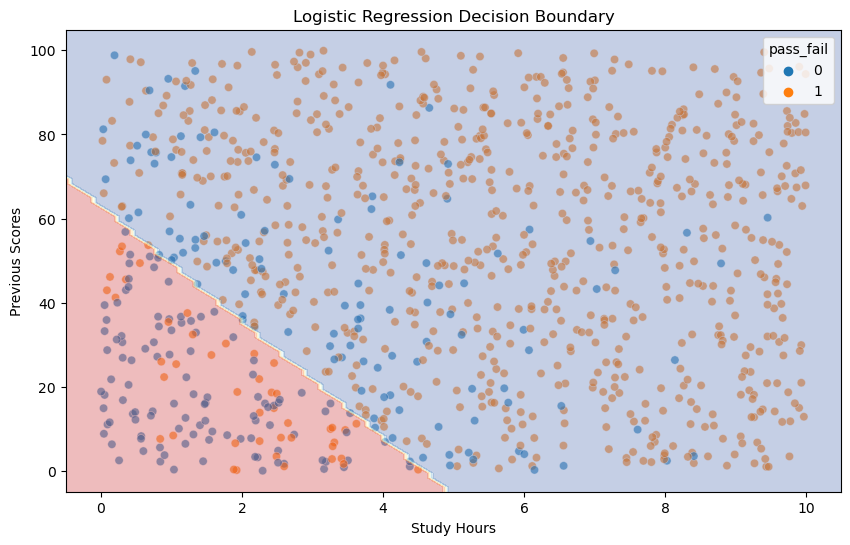


Model Coefficients:
           Feature  Coefficient
0      Study Hours     1.443693
1  Previous Scores     1.039932


In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='study_hours', y='previous_scores', hue='pass_fail', data=df, alpha=0.6)

x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.xlabel('Study Hours')
plt.ylabel('Previous Scores')
plt.title('Logistic Regression Decision Boundary')
plt.show()

# Interpret coefficients
coef_df = pd.DataFrame({
    'Feature': ['Study Hours', 'Previous Scores'],
    'Coefficient': model.coef_[0]
})
print("\nModel Coefficients:")
print(coef_df)
